In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.set_option('display.float_format', '{:.3f}'.format)
pd.set_option('display.max_columns', 999)

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("out.csv")
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Aldıkları Hizmet Sayısı,Aldıkları Hizmet Başına Aylık Ortalama Ücreti,Sözleşmeli Mi?,Otomatik Ödeme mi?,Streaming,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Group_Kısa Süreli Müşteri,Tenure_Group_Orta Süreli Müşteri,Tenure_Group_Uzun Süreli Müşteri
0,0,7590-VHVEG,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.850,29.850,0,2,14.925,0,0,0,False,False,False,False,False,True,False,False,False,False
1,1,5575-GNVDE,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.950,1889.500,0,4,14.238,1,0,0,False,False,True,False,False,False,True,True,False,False
2,2,3668-QPYBK,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.850,108.150,1,4,13.463,0,0,0,False,False,False,False,False,False,True,False,False,False
3,3,7795-CFOCW,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.300,1840.750,0,4,10.575,1,1,0,False,False,True,False,False,False,False,False,True,False
4,4,9237-HQITU,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.700,151.650,1,2,35.350,0,0,0,True,False,False,False,False,True,False,False,False,False


In [3]:
df.drop("Unnamed: 0",axis=1, inplace=True)

In [4]:
X = df.drop(["Churn", "customerID"], axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Fitting 10 folds for each of 432 candidates, totalling 4320 fits
QDA En İyi Parametreler: {'priors': [0.2, 0.8], 'reg_param': 0.0007, 'store_covariance': True, 'tol': 0.0001}
QDA En İyi Recall Score: 0.860887815536772


              precision    recall  f1-score   support

           0       0.94      0.63      0.76      1036
           1       0.47      0.90      0.61       373

    accuracy                           0.70      1409
   macro avg       0.71      0.76      0.68      1409
weighted avg       0.82      0.70      0.72      1409

ROC AUC Score: 0.8486535654766217


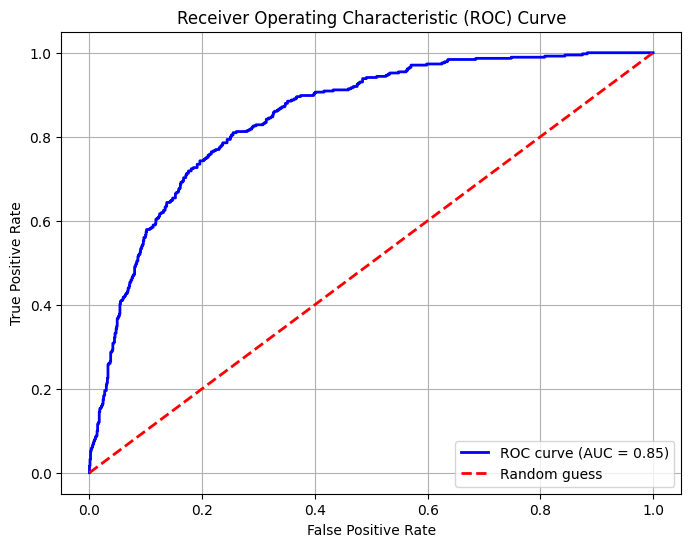

In [5]:
qda_cv = GridSearchCV(estimator=QuadraticDiscriminantAnalysis(),
                      param_grid={'reg_param': [0.0001,0.0003,0.0005,0.00005,0.0007,0.00009], 
                                  'priors': [None, [0.50, 0.50], [0.7, 0.3], [0.8, 0.2], [0.3, 0.7], [0.2, 0.8]],
                                  'store_covariance': [True, False],
                                  'tol': [0.0001,0.0003,0.0005,0.00005,0.0007,0.00009]},
                                  n_jobs=-1,
                                  verbose=2,
                                  cv=10,
                                  scoring='recall').fit(X, y)

print("QDA En İyi Parametreler:", qda_cv.best_params_)
print("QDA En İyi Recall Score:", qda_cv.best_score_)

qda_final = QuadraticDiscriminantAnalysis(**qda_cv.best_params_).fit(X_train, y_train)

print("\n")

y_predicted_final = qda_final.predict(X_test)
print(classification_report(y_test, y_predicted_final))

y_pred_proba = qda_final.predict_proba(X_test)[:, 1]  # Sadece 1. sınıfın olasılığı
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Fitting 10 folds for each of 32 candidates, totalling 320 fits
AdaBoost En İyi Parametreler: {'estimator': DecisionTreeClassifier(max_depth=2), 'learning_rate': 10.0, 'n_estimators': 50}
AdaBoost En İyi Recall Score: 0.6122729306487695


              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1036
           1       0.57      0.66      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409

ROC AUC Score: 0.7939111555063296


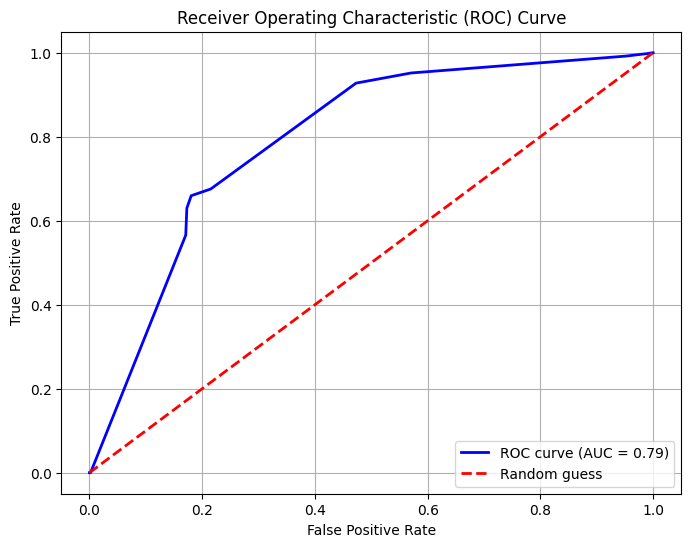

In [6]:
param_grid = {
    'estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 1.0, 10.0]
}

ada_cv = GridSearchCV(estimator=AdaBoostClassifier(),
                      param_grid=param_grid,
                      n_jobs=-1,
                      verbose=2,
                      cv=10,
                      scoring='recall')

ada_cv.fit(X_train, y_train)  # Fit GridSearchCV on the training data

print("AdaBoost En İyi Parametreler:", ada_cv.best_params_)
print("AdaBoost En İyi Recall Score:", ada_cv.best_score_)

# Modeli en iyi parametrelerle tekrar fit et
ada_final = AdaBoostClassifier(**ada_cv.best_params_).fit(X_train, y_train)

print("\n")

# Tahminler ve metrikler
y_predicted_final = ada_final.predict(X_test)
print(classification_report(y_test, y_predicted_final))

# ROC AUC Score
y_pred_proba = ada_final.predict_proba(X_test)[:, 1]  # Sadece 1. sınıfın olasılığı
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Fitting 10 folds for each of 30 candidates, totalling 300 fits
GaussianNB En İyi Parametreler: {'priors': [0.2, 0.8], 'var_smoothing': 1e-07}
GaussianNB En İyi Recall Score: 0.9004830084526478


              precision    recall  f1-score   support

           0       0.94      0.50      0.66      1036
           1       0.40      0.92      0.56       373

    accuracy                           0.61      1409
   macro avg       0.67      0.71      0.61      1409
weighted avg       0.80      0.61      0.63      1409

ROC AUC Score: 0.8366306271802251


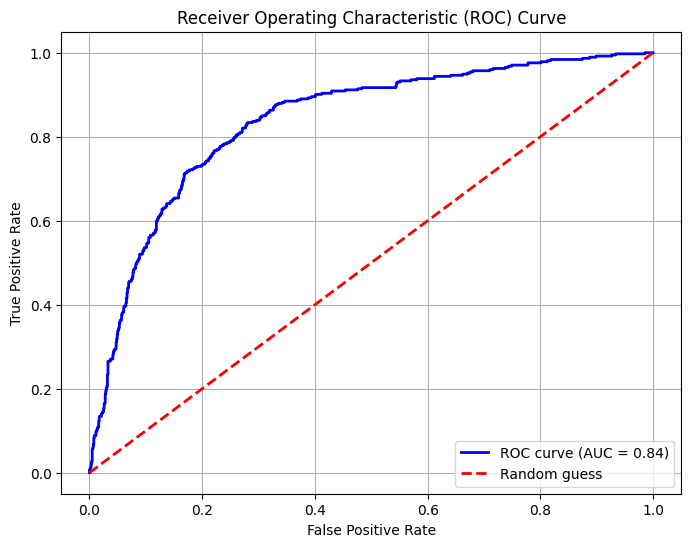

In [7]:
param_grid = {
    'priors': [None, [0.5, 0.5], [0.7, 0.3], [0.8, 0.2], [0.3, 0.7], [0.2, 0.8]],
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# GridSearchCV
gnb_cv = GridSearchCV(estimator=GaussianNB(),
                      param_grid=param_grid,
                      n_jobs=-1,
                      verbose=2,
                      cv=10,
                      scoring='recall').fit(X, y) 

print("GaussianNB En İyi Parametreler:", gnb_cv.best_params_)
print("GaussianNB En İyi Recall Score:", gnb_cv.best_score_)

# Modeli en iyi parametrelerle tekrar fit et
gnb_final = GaussianNB(**gnb_cv.best_params_).fit(X_train, y_train)

print("\n")

# Tahminler ve metrikler
y_predicted_final = gnb_final.predict(X_test)
print(classification_report(y_test, y_predicted_final))

# ROC AUC Score
y_pred_proba = gnb_final.predict_proba(X_test)[:, 1]  # Sadece 1. sınıfın olasılığı
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [8]:
from sklearn.ensemble import VotingClassifier, StackingClassifier
from sklearn.metrics import recall_score
ensemble = VotingClassifier(estimators=[('gnb', GaussianNB().set_params(**gnb_cv.best_params_)), 
                                        ('gbm', QuadraticDiscriminantAnalysis().set_params(**qda_cv.best_params_)), 
                                        ('ada', AdaBoostClassifier(random_state=42).set_params(**ada_cv.best_params_))], 
                                        voting='hard').fit(X_train, y_train)

y_predicted = ensemble.predict(X_test)

report = classification_report(y_test, y_predicted)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.64      0.76      1036
           1       0.47      0.89      0.61       373

    accuracy                           0.71      1409
   macro avg       0.71      0.76      0.69      1409
weighted avg       0.82      0.71      0.72      1409



In [9]:
stacking_clf = StackingClassifier(
    estimators=[('gnb', GaussianNB().set_params(**gnb_cv.best_params_)), 
                                        ('gbm', QuadraticDiscriminantAnalysis().set_params(**qda_cv.best_params_)), 
                                        ('ada', AdaBoostClassifier(random_state=42).set_params(**ada_cv.best_params_))],
    final_estimator=GaussianNB()).fit(X_train, y_train)

y_predicted = stacking_clf.predict(X_test)

report = classification_report(y_test, y_predicted)
print("Voting Classifier için Classification Report:")
print(report)

Voting Classifier için Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.72      0.81      1036
           1       0.52      0.82      0.63       373

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409

